In [1]:
# Airbnb Price Prediction Project
# Projet de Data Science - Master Big Data et IA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("=== AIRBNB PRICE PREDICTION PROJECT ===")
print("Objectif: Prédire le logarithme des prix Airbnb")
print("Dataset: Listings Airbnb avec features variées")
print("=" * 50)

=== AIRBNB PRICE PREDICTION PROJECT ===
Objectif: Prédire le logarithme des prix Airbnb
Dataset: Listings Airbnb avec features variées


In [3]:
# ============================================================================
# 1. CHARGEMENT ET PREMIÈRE EXPLORATION DES DONNÉES
# ============================================================================

print("\n📊 1. CHARGEMENT DES DONNÉES")
print("-" * 30)

# Chargement des datasets
print("📂 Chargement des fichiers CSV...")
df_train = pd.read_csv('airbnb_train.csv')
df_test = pd.read_csv('airbnb_test.csv')

print(f"✅ Données chargées avec succès!")
print(f"   - Train set: {df_train.shape[0]} lignes, {df_train.shape[1]} colonnes")
print(f"   - Test set: {df_test.shape[0]} lignes, {df_test.shape[1]} colonnes")

# Nettoyage des colonnes inutiles
if 'Unnamed: 0' in df_train.columns:
    df_train = df_train.drop('Unnamed: 0', axis=1)
    print("🧹 Colonne 'Unnamed: 0' supprimée du train set")

if 'Unnamed: 0' in df_test.columns:
    df_test = df_test.drop('Unnamed: 0', axis=1)
    print("🧹 Colonne 'Unnamed: 0' supprimée du test set")

# Vérification que la variable cible est présente dans le train set
if 'log_price' in df_train.columns:
    print(f"✅ Variable cible 'log_price' trouvée dans le train set")
else:
    print("❌ Variable cible 'log_price' non trouvée dans le train set!")

# Vérification que les colonnes sont cohérentes entre train et test
train_cols = set(df_train.columns)
test_cols = set(df_test.columns)
common_cols = train_cols.intersection(test_cols)
print(f"📊 Colonnes communes: {len(common_cols)}")
if 'log_price' in train_cols:
    print(f"📊 Colonnes dans train uniquement: {train_cols - test_cols}")
if len(test_cols - train_cols) > 0:
    print(f"📊 Colonnes dans test uniquement: {test_cols - train_cols}")

print(f"📊 Dimensions après nettoyage:")
print(f"   - Train set: {df_train.shape[0]} lignes, {df_train.shape[1]} colonnes")
print(f"   - Test set: {df_test.shape[0]} lignes, {df_test.shape[1]} colonnes")


📊 1. CHARGEMENT DES DONNÉES
------------------------------
📂 Chargement des fichiers CSV...
✅ Données chargées avec succès!
   - Train set: 22234 lignes, 28 colonnes
   - Test set: 51877 lignes, 27 colonnes
🧹 Colonne 'Unnamed: 0' supprimée du test set
✅ Variable cible 'log_price' trouvée dans le train set
📊 Colonnes communes: 26
📊 Colonnes dans train uniquement: {'id', 'log_price'}
📊 Dimensions après nettoyage:
   - Train set: 22234 lignes, 28 colonnes
   - Test set: 51877 lignes, 26 colonnes


In [4]:
# ============================================================================
# 2. ANALYSE DESCRIPTIVE DU DATASET
# ============================================================================

print("\n📋 2. ANALYSE DESCRIPTIVE")
print("-" * 30)

print("\n🔍 Structure du dataset d'entraînement:")
print(df_train.info())

print("\n📊 Aperçu des premières lignes:")
print(df_train.head())

print("\n🎯 Variable cible (log_price):")
if 'log_price' in df_train.columns:
    print(f"   - Moyenne: {df_train['log_price'].mean():.2f}")
    print(f"   - Médiane: {df_train['log_price'].median():.2f}")
    print(f"   - Écart-type: {df_train['log_price'].std():.2f}")
    print(f"   - Min: {df_train['log_price'].min():.2f}")
    print(f"   - Max: {df_train['log_price'].max():.2f}")

print("\n📈 Types de variables:")
print(df_train.dtypes.value_counts())


📋 2. ANALYSE DESCRIPTIVE
------------------------------

🔍 Structure du dataset d'entraînement:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 

In [5]:
# ============================================================================
# 3. ANALYSE DES VALEURS MANQUANTES
# ============================================================================

print("\n❓ 3. ANALYSE DES VALEURS MANQUANTES")
print("-" * 30)

# Fonction pour analyser les valeurs manquantes
def analyze_missing_values(df, dataset_name):
    print(f"\n📊 {dataset_name}:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Colonne': missing_data.index,
        'Valeurs manquantes': missing_data.values,
        'Pourcentage': missing_percent.values
    }).sort_values('Pourcentage', ascending=False)
    
    # Afficher seulement les colonnes avec des valeurs manquantes
    missing_df = missing_df[missing_df['Valeurs manquantes'] > 0]
    
    if len(missing_df) > 0:
        print(missing_df.to_string(index=False))
    else:
        print("✅ Aucune valeur manquante détectée!")
    
    return missing_df

missing_train = analyze_missing_values(df_train, "Dataset d'entraînement")
missing_test = analyze_missing_values(df_test, "Dataset de test")



❓ 3. ANALYSE DES VALEURS MANQUANTES
------------------------------

📊 Dataset d'entraînement:
               Colonne  Valeurs manquantes  Pourcentage
    host_response_rate                5475    24.624449
  review_scores_rating                4978    22.389134
          first_review                4725    21.251237
           last_review                4716    21.210758
         neighbourhood                2086     9.382028
               zipcode                 303     1.362778
  host_has_profile_pic                  56     0.251867
host_identity_verified                  56     0.251867
            host_since                  56     0.251867
             bathrooms                  51     0.229378
                  beds                  35     0.157417
              bedrooms                  26     0.116938

📊 Dataset de test:
               Colonne  Valeurs manquantes  Pourcentage
    host_response_rate               12824    24.720011
  review_scores_rating               11744   


📊 4. VISUALISATIONS EXPLORATOIRES
------------------------------


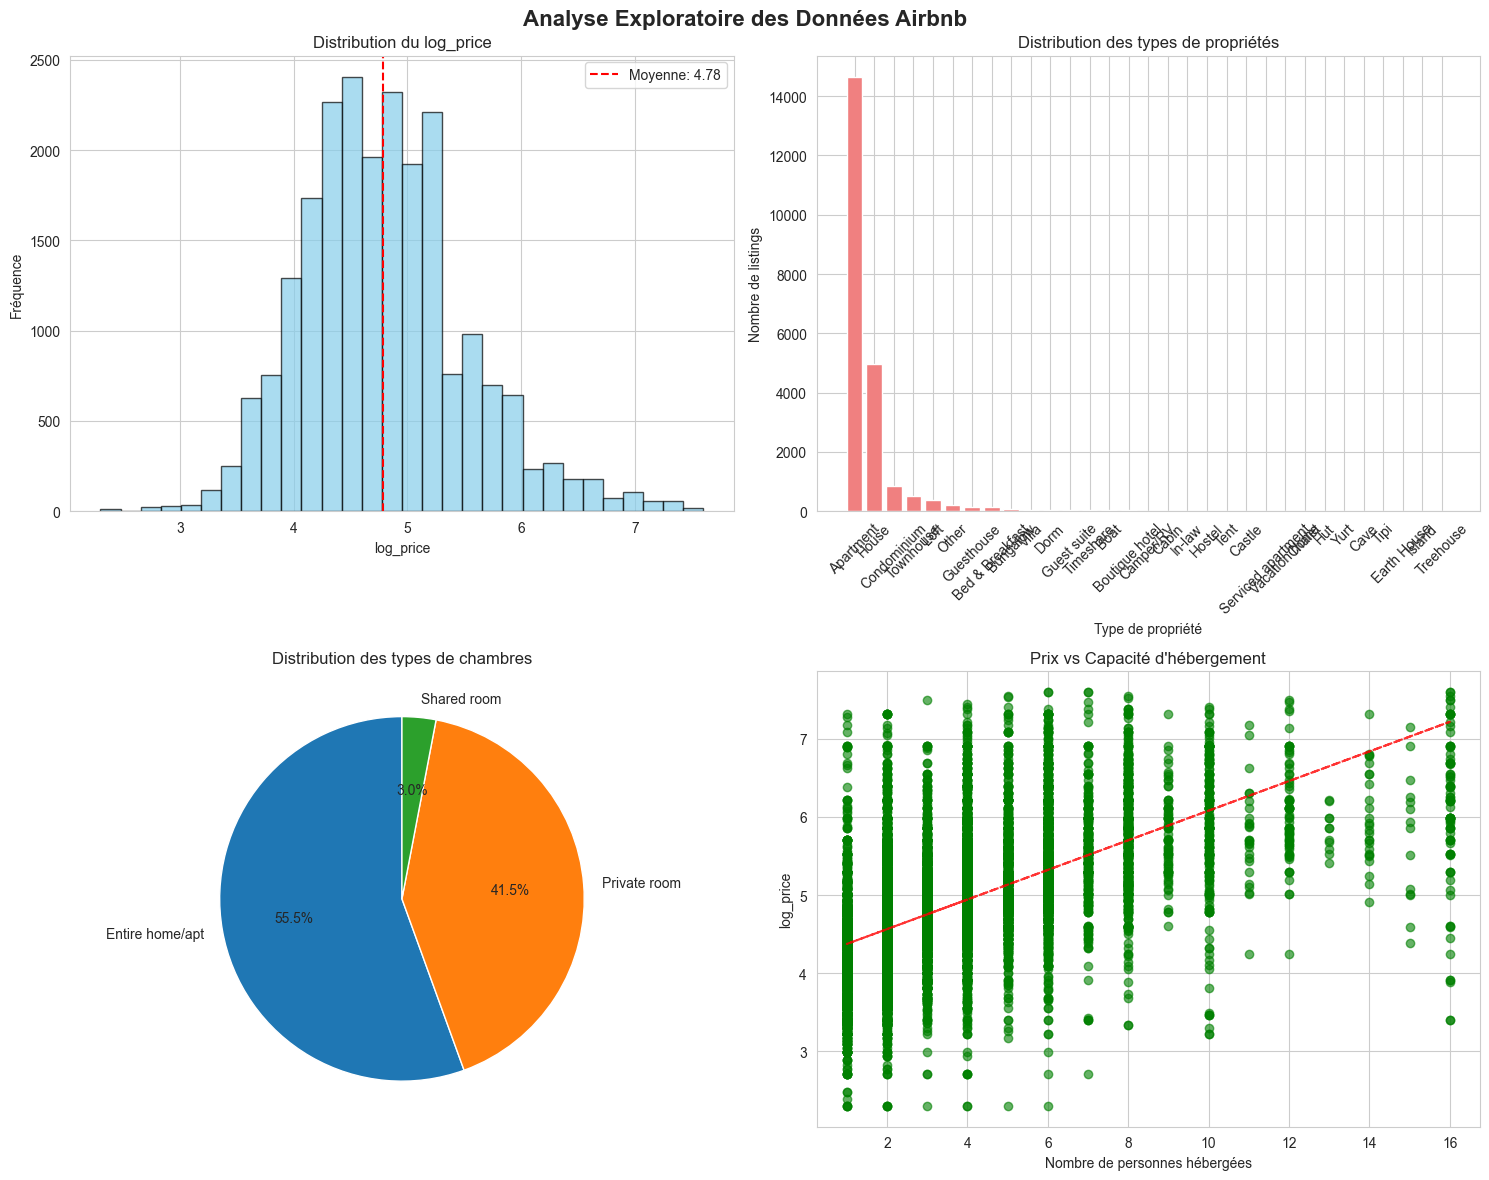

In [6]:
# ============================================================================
# 4. VISUALISATIONS EXPLORATOIRES
# ============================================================================

print("\n📊 4. VISUALISATIONS EXPLORATOIRES")
print("-" * 30)

# Configuration pour les graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analyse Exploratoire des Données Airbnb', fontsize=16, fontweight='bold')

# 4.1 Distribution de la variable cible
if 'log_price' in df_train.columns:
    axes[0, 0].hist(df_train['log_price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution du log_price')
    axes[0, 0].set_xlabel('log_price')
    axes[0, 0].set_ylabel('Fréquence')
    axes[0, 0].axvline(df_train['log_price'].mean(), color='red', linestyle='--', label=f'Moyenne: {df_train["log_price"].mean():.2f}')
    axes[0, 0].legend()

# 4.2 Distribution des types de propriétés
property_counts = df_train['property_type'].value_counts()
axes[0, 1].bar(range(len(property_counts)), property_counts.values, color='lightcoral')
axes[0, 1].set_title('Distribution des types de propriétés')
axes[0, 1].set_xlabel('Type de propriété')
axes[0, 1].set_ylabel('Nombre de listings')
axes[0, 1].set_xticks(range(len(property_counts)))
axes[0, 1].set_xticklabels(property_counts.index, rotation=45)

# 4.3 Distribution des types de chambres
room_counts = df_train['room_type'].value_counts()
axes[1, 0].pie(room_counts.values, labels=room_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribution des types de chambres')

# 4.4 Prix vs Nombre de personnes hébergées
if 'log_price' in df_train.columns:
    axes[1, 1].scatter(df_train['accommodates'], df_train['log_price'], alpha=0.6, color='green')
    axes[1, 1].set_title('Prix vs Capacité d\'hébergement')
    axes[1, 1].set_xlabel('Nombre de personnes hébergées')
    axes[1, 1].set_ylabel('log_price')
    
    # Ligne de tendance
    z = np.polyfit(df_train['accommodates'], df_train['log_price'], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(df_train['accommodates'], p(df_train['accommodates']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()


🔗 5. ANALYSE DES CORRÉLATIONS
------------------------------
Variables numériques trouvées: ['id', 'log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']


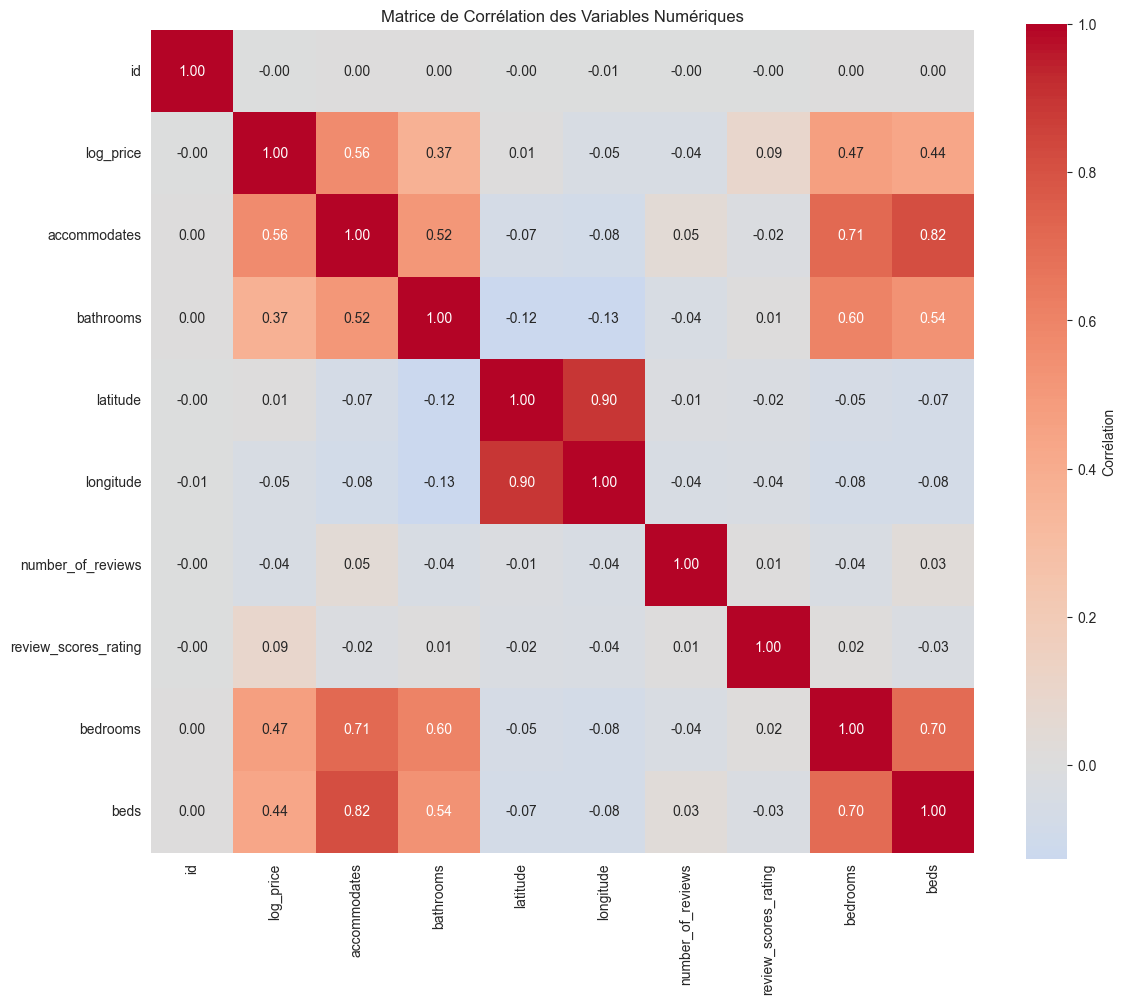


📈 Corrélations avec log_price:
   accommodates: 0.565
   bedrooms: 0.473
   beds: 0.435
   bathrooms: 0.369
   review_scores_rating: 0.092
   latitude: 0.005
   id: -0.002
   number_of_reviews: -0.039
   longitude: -0.045


In [7]:
# ============================================================================
# 5. ANALYSE DES CORRÉLATIONS
# ============================================================================

print("\n🔗 5. ANALYSE DES CORRÉLATIONS")
print("-" * 30)

# Sélection des variables numériques
numeric_columns = df_train.select_dtypes(include=[np.number]).columns
print(f"Variables numériques trouvées: {list(numeric_columns)}")

if len(numeric_columns) > 1:
    # Matrice de corrélation
    correlation_matrix = df_train[numeric_columns].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f', cbar_kws={'label': 'Corrélation'})
    plt.title('Matrice de Corrélation des Variables Numériques')
    plt.tight_layout()
    plt.show()
    
    # Corrélations avec la variable cible
    if 'log_price' in correlation_matrix.columns:
        price_corr = correlation_matrix['log_price'].sort_values(ascending=False)
        print("\n📈 Corrélations avec log_price:")
        for var, corr in price_corr.items():
            if var != 'log_price':
                print(f"   {var}: {corr:.3f}")


🗺️ 6. ANALYSE GÉOGRAPHIQUE
------------------------------
Coordonnées géographiques disponibles:
   - Latitude: 33.34 à 42.39
   - Longitude: -122.51 à -70.99


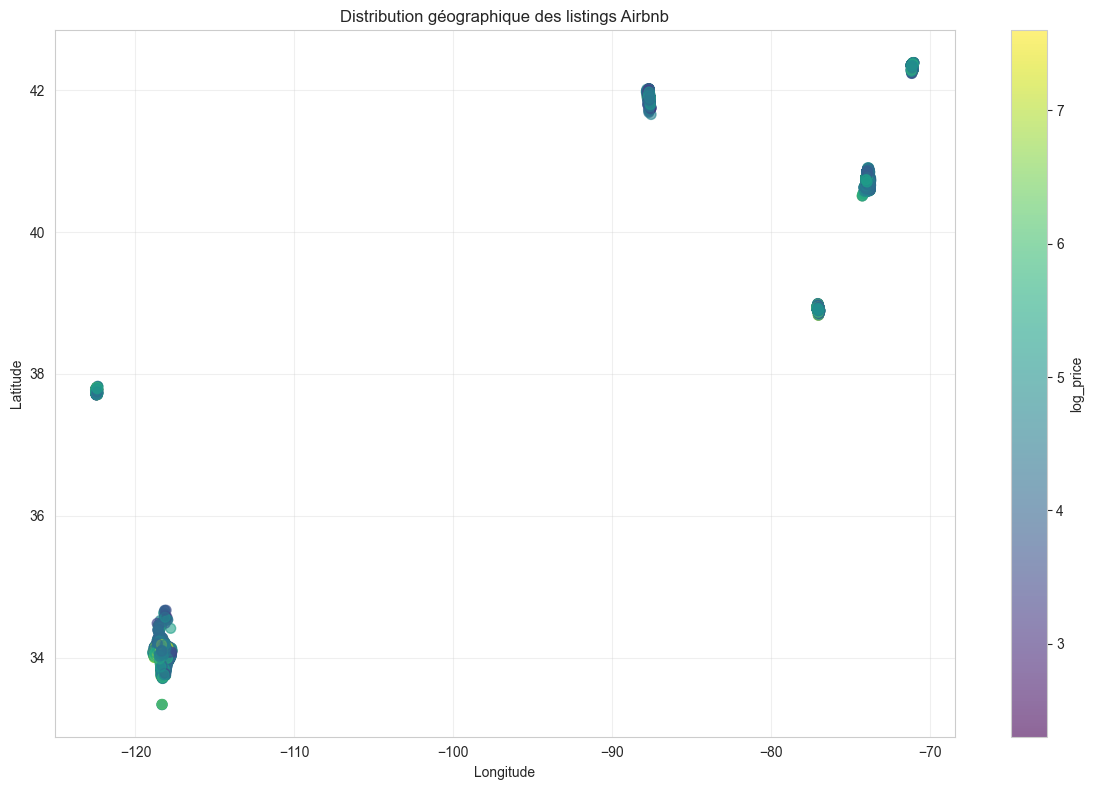


🏙️ Statistiques par ville:
        log_price       accommodates
             mean count         mean
city                                
Boston       4.88  1028         3.25
Chicago      4.65  1127         3.89
DC           4.96  1744         3.50
LA           4.71  6672         3.36
NYC          4.72  9739         2.84
SF           5.19  1924         3.25


In [8]:
# ============================================================================
# 6. ANALYSE GÉOGRAPHIQUE
# ============================================================================

print("\n🗺️ 6. ANALYSE GÉOGRAPHIQUE")
print("-" * 30)

if 'latitude' in df_train.columns and 'longitude' in df_train.columns:
    print(f"Coordonnées géographiques disponibles:")
    print(f"   - Latitude: {df_train['latitude'].min():.2f} à {df_train['latitude'].max():.2f}")
    print(f"   - Longitude: {df_train['longitude'].min():.2f} à {df_train['longitude'].max():.2f}")
    
    # Carte des listings
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df_train['longitude'], df_train['latitude'], 
                         c=df_train['log_price'] if 'log_price' in df_train.columns else 'blue',
                         cmap='viridis', alpha=0.6, s=50)
    plt.colorbar(scatter, label='log_price' if 'log_price' in df_train.columns else 'Listings')
    plt.title('Distribution géographique des listings Airbnb')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Analyse par ville
    if 'city' in df_train.columns:
        city_stats = df_train.groupby('city').agg({
            'log_price': ['mean', 'count'] if 'log_price' in df_train.columns else ['count'],
            'accommodates': 'mean'
        }).round(2)
        print("\n🏙️ Statistiques par ville:")
        print(city_stats)


In [9]:
# ============================================================================
# 7. ANALYSE DES AMENITIES
# ============================================================================

print("\n🏠 7. ANALYSE DES ÉQUIPEMENTS (AMENITIES)")
print("-" * 30)

def parse_amenities(amenities_str):
    """Parse la colonne amenities qui est au format string de liste"""
    if pd.isna(amenities_str) or amenities_str == '':
        return []
    
    # Nettoyer et parser la string
    amenities_str = amenities_str.strip('{}')
    # Séparer par virgules et nettoyer
    amenities = [amenity.strip(' "') for amenity in amenities_str.split(',')]
    return [amenity for amenity in amenities if amenity]

# Appliquer le parsing
df_train['amenities_list'] = df_train['amenities'].apply(parse_amenities)
df_train['amenities_count'] = df_train['amenities_list'].apply(len)

print(f"Nombre moyen d'équipements: {df_train['amenities_count'].mean():.1f}")
print(f"Nombre max d'équipements: {df_train['amenities_count'].max()}")

# Top 10 des équipements les plus fréquents
all_amenities = []
for amenities_list in df_train['amenities_list']:
    all_amenities.extend(amenities_list)

from collections import Counter
amenity_counts = Counter(all_amenities)
top_amenities = amenity_counts.most_common(10)

print("\n🔝 Top 10 des équipements les plus fréquents:")
for amenity, count in top_amenities:
    print(f"   {amenity}: {count}")

# Relation entre nombre d'équipements et prix
if 'log_price' in df_train.columns:
    correlation_amenities = df_train['amenities_count'].corr(df_train['log_price'])
    print(f"\n📊 Corrélation nombre d'équipements / prix: {correlation_amenities:.3f}")


🏠 7. ANALYSE DES ÉQUIPEMENTS (AMENITIES)
------------------------------
Nombre moyen d'équipements: 17.7
Nombre max d'équipements: 86

🔝 Top 10 des équipements les plus fréquents:
   Wireless Internet: 21400
   Kitchen: 20199
   Heating: 20156
   Essentials: 19224
   Smoke detector: 18587
   Air conditioning: 16571
   TV: 15809
   Shampoo: 14847
   Hangers: 14713
   Carbon monoxide detector: 14224

📊 Corrélation nombre d'équipements / prix: 0.198


In [10]:
# ============================================================================
# 8. INSIGHTS ET HYPOTHÈSES
# ============================================================================

print("\n💡 8. INSIGHTS ET HYPOTHÈSES GÉNÉRÉS")
print("-" * 30)

insights = []

# Analyse de la distribution des prix
if 'log_price' in df_train.columns:
    price_std = df_train['log_price'].std()
    if price_std > 1:
        insights.append("📈 Grande variabilité des prix → Potentiel pour la prédiction")
    else:
        insights.append("📊 Variabilité modérée des prix")

# Analyse des corrélations
if 'accommodates' in df_train.columns and 'log_price' in df_train.columns:
    accom_corr = df_train['accommodates'].corr(df_train['log_price'])
    if abs(accom_corr) > 0.3:
        insights.append(f"🏠 Forte corrélation capacité/prix ({accom_corr:.2f}) → Feature importante")

# Analyse des valeurs manquantes
if len(missing_train) > 0:
    high_missing = missing_train[missing_train['Pourcentage'] > 20]
    if len(high_missing) > 0:
        insights.append("❓ Plusieurs variables avec beaucoup de valeurs manquantes → Stratégies d'imputation nécessaires")

# Analyse géographique
if 'city' in df_train.columns:
    n_cities = df_train['city'].nunique()
    if n_cities > 1:
        insights.append(f"🗺️ Données multi-villes ({n_cities} villes) → Potentiel pour features géographiques")

# Analyse des équipements
if 'amenities_count' in df_train.columns:
    amenities_range = df_train['amenities_count'].max() - df_train['amenities_count'].min()
    if amenities_range > 10:
        insights.append("🏠 Large gamme d'équipements → Feature engineering sur les amenities")

print("\n🎯 Insights principaux:")
for i, insight in enumerate(insights, 1):
    print(f"   {i}. {insight}")


💡 8. INSIGHTS ET HYPOTHÈSES GÉNÉRÉS
------------------------------

🎯 Insights principaux:
   1. 📊 Variabilité modérée des prix
   2. 🏠 Forte corrélation capacité/prix (0.56) → Feature importante
   3. ❓ Plusieurs variables avec beaucoup de valeurs manquantes → Stratégies d'imputation nécessaires
   4. 🗺️ Données multi-villes (6 villes) → Potentiel pour features géographiques
   5. 🏠 Large gamme d'équipements → Feature engineering sur les amenities


### DÉBUT DU PREPROCESSING COMPLET

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
import re
import ast
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("🚀 DÉBUT DU PREPROCESSING COMPLET")
print("=" * 60)

🚀 DÉBUT DU PREPROCESSING COMPLET


In [22]:
# ============================================================================
# PHASE 0: CHARGEMENT ET PRÉPARATION
# ============================================================================    
 # Création d'un indicateur train/test pour traitement uniforme
df_train['is_train'] = True
df_test['is_train'] = False
df_test['log_price'] = np.nan  # Ajout colonne target pour test
    
# Concaténation pour preprocessing uniforme
df_combined = pd.concat([df_train, df_test], ignore_index=True)
print(f"🔗 Datasets combinés: {df_combined.shape[0]} lignes totales")
    


🔗 Datasets combinés: 74111 lignes totales


In [24]:
#df_combined

In [14]:
# ============================================================================
# PHASE 1: TRAITEMENT GÉOGRAPHIQUE
# ============================================================================

def phase1_geographic_features(df):
    """Traitement des features géographiques"""
    print("\n🗺️ PHASE 1: TRAITEMENT GÉOGRAPHIQUE")
    print("-" * 40)
    
    # 1. Clustering géographique basé sur lat/long
    print("📍 Création de clusters géographiques...")
    coords = df[['latitude', 'longitude']].dropna()
    if len(coords) > 0:
        kmeans = KMeans(n_clusters=20, random_state=42)
        df.loc[coords.index, 'geo_cluster'] = kmeans.fit_predict(coords)
        df['geo_cluster'] = df['geo_cluster'].fillna(-1).astype(int)
        print(f"   ✅ {df['geo_cluster'].nunique()} clusters créés")
    
    # 2. Récupération neighbourhood via coordonnées (simulation)
    print("🏘️ Traitement des neighbourhoods manquants...")
    neighbourhood_missing = df['neighbourhood'].isna()
    print(f"   📊 {neighbourhood_missing.sum()} neighbourhoods manquants")
    
    # Pour les neighbourhoods manquants, utiliser le cluster géographique
    df.loc[neighbourhood_missing, 'neighbourhood'] = df.loc[neighbourhood_missing, 'geo_cluster'].apply(
        lambda x: f"Cluster_{x}" if x != -1 else "Unknown"
    )
    
    # 3. Création de features de prix moyen par zone (seulement sur train)
    print("💰 Calcul des prix moyens par zone...")
    train_mask = df['is_train'] == True
    
    if train_mask.any():
        # Prix moyen par neighbourhood
        neighbourhood_prices = df[train_mask].groupby('neighbourhood')['log_price'].mean()
        df['neighbourhood_price_mean'] = df['neighbourhood'].map(neighbourhood_prices)
        
        # Prix moyen par city
        city_prices = df[train_mask].groupby('city')['log_price'].mean()
        df['city_price_mean'] = df['city'].map(city_prices)
        
        # Prix moyen par cluster
        cluster_prices = df[train_mask].groupby('geo_cluster')['log_price'].mean()
        df['cluster_price_mean'] = df['geo_cluster'].map(cluster_prices)
        
        print(f"   ✅ Features de prix créées")
    
    # 4. Traitement des zipcodes
    print("📮 Traitement des zipcodes...")
    df['zipcode'] = df['zipcode'].astype(str).str.replace('.0', '')
    df['zipcode'] = df['zipcode'].replace('nan', np.nan)
    zipcode_missing = df['zipcode'].isna().sum()
    print(f"   📊 {zipcode_missing} zipcodes manquants (gardés comme Unknown)")
    
    print("✅ Phase 1 terminée!")
    return df

In [ ]:
# ============================================================================
# PHASE 2: FEATURE ENGINEERING SUR LES AMENITIES
# ============================================================================

def phase2_amenities_features(df):
    """Traitement et feature engineering des amenities"""
    print("\n🛠️ PHASE 2: FEATURE ENGINEERING AMENITIES")
    print("-" * 40)
    
    # 1. Parsing des amenities
    print("🔍 Parsing des amenities...")
    
    def parse_amenities(amenities_str):
        """Parse la string amenities en liste"""
        if pd.isna(amenities_str):
            return []
        try:
            # Nettoyage de la string
            amenities_str = amenities_str.strip('{}')
            # Split par virgule et nettoyage
            amenities = [item.strip().strip('"') for item in amenities_str.split(',')]
            return [item for item in amenities if item]
        except:
            return []
    
    df['amenities_list'] = df['amenities'].apply(parse_amenities)
    
    # 2. Comptage total des amenities
    df['amenities_count'] = df['amenities_list'].apply(len)
    print(f"   📊 Moyenne amenities par listing: {df['amenities_count'].mean():.1f}")
    
    # 3. Création de features binaires pour amenities importantes
    print("🎯 Création de features binaires pour amenities clés...")
    
    important_amenities = [
        'Wireless Internet', 'WiFi', 'Internet',
        'Air conditioning', 'Heating',
        'Kitchen', 'Washer', 'Dryer',
        'TV', 'Cable TV',
        'Free parking on premises', 'Parking',
        'Elevator in building',
        'Pool', 'Gym',
        'Pets allowed',
        'Smoke detector', 'Carbon monoxide detector',
        'Fire extinguisher', 'First aid kit',
        'Hair dryer', 'Shampoo', 'Essentials',
        'Laptop friendly workspace'
    ]
    
    for amenity in important_amenities:
        col_name = f'has_{amenity.lower().replace(" ", "_").replace("/", "_")}'
        df[col_name] = df['amenities_list'].apply(
            lambda x: 1 if any(amenity.lower() in item.lower() for item in x) else 0
        )
    
    # 4. Catégorisation des amenities
    print("📋 Création de catégories d'amenities...")
    
    # Confort
    comfort_amenities = ['air conditioning', 'heating', 'tv', 'wireless internet', 'wifi']
    df['comfort_amenities'] = df['amenities_list'].apply(
        lambda x: sum(1 for item in x if any(comfort in item.lower() for comfort in comfort_amenities))
    )
    
    # Sécurité
    safety_amenities = ['smoke detector', 'carbon monoxide detector', 'fire extinguisher', 'first aid kit']
    df['safety_amenities'] = df['amenities_list'].apply(
        lambda x: sum(1 for item in x if any(safety in item.lower() for safety in safety_amenities))
    )
    
    # Cuisine et nettoyage
    kitchen_amenities = ['kitchen', 'washer', 'dryer', 'dishwasher', 'microwave']
    df['kitchen_amenities'] = df['amenities_list'].apply(
        lambda x: sum(1 for item in x if any(kitchen in item.lower() for kitchen in kitchen_amenities))
    )
    
    print("✅ Phase 2 terminée!")
    return df
